**1.Gerekli Kütüphaneleri Yükleme**

In [ ]:
import pandas as pd # Veri işlenmesi, değiştirilmesi ve veri analizi için kullanılır.
import numpy as np # Bilimsel ve mühendislik alanlarında yüksek performanslı sayısal işlemlerde kullanılır.
import matplotlib.pyplot as plt # Veri görselleştirmede kullanılan kütüphanedir.
import seaborn as sns # Matplotlib kütüphanesini temel alan bir python görselleştirme kütüphanesidir.
from sklearn.model_selection import train_test_split # Bir veri setini eğitim ve test kümelerine bölmede kullanılır.
from sklearn.linear_model import LogisticRegression # İki veri faktörü arasındaki ilişkiyi bulmak için kullanılır.
from sklearn.preprocessing import MinMaxScaler # Belirli bir aralığa verileri sıkıştırabilir veye genişletebilir.

**Veri Setini Yükleme**

In [ ]:
veri = pd.read_csv("E_Commerce_Dataset.csv") #Veri seti Üzerinde işlem yapmak için veri seti değişkenine atama işlemi yaptık.

In [ ]:
veri.head()# Veri setinin ilk beş satırını yazdırır.

,Ürün Adı,Kategori,Marka,Fiyat,Stok Miktarı,Satış Sayısı,Yorum Sayısı,Ortalama Puan,Tarih
0,Ürün5,Ev & Bahçe,Marka5,55,96,283,1,1.9,2024-02-17 15:18:45.291585
1,Ürün8,Kozmetik,Marka1,120,37,835,11,4.0,2023-07-21 15:18:45.292898
2,Ürün8,Aksesuar,Marka5,110,14,457,3,2.9,2024-03-19 15:18:45.293026
3,Ürün9,Ev & Bahçe,Marka4,133,7,254,8,4.7,2024-03-01 15:18:45.293077
4,Ürün2,Ev & Bahçe,Marka3,268,80,35,12,3.5,2024-05-21 15:18:45.293117


**2.Veri Keşfi ve Ön İşleme**

In [ ]:
print(veri.shape) # Veri seti boyutlarını görmek için kullanılır.

(1000, 9)


In [ ]:
print(veri.info) #Veri seti hakkında bilgi verir.

<bound method DataFrame.info of     Ürün Adı    Kategori   Marka  Fiyat  Stok Miktarı  Satış Sayısı  \
0      Ürün5  Ev & Bahçe  Marka5     55            96           283   
1      Ürün8    Kozmetik  Marka1    120            37           835   
2      Ürün8    Aksesuar  Marka5    110            14           457   
3      Ürün9  Ev & Bahçe  Marka4    133             7           254   
4      Ürün2  Ev & Bahçe  Marka3    268            80            35   
..       ...         ...     ...    ...           ...           ...   
995    Ürün1  Elektronik  Marka4    351            73           418   
996    Ürün8  Ev & Bahçe  Marka5    291            63           735   
997    Ürün8  Ev & Bahçe  Marka5    366            28           867   
998    Ürün4    Aksesuar  Marka1     24            29           610   
999    Ürün8       Giyim  Marka3    346            88           859   

     Yorum Sayısı  Ortalama Puan                       Tarih  
0               1            1.9  2024-02-17 15:18:4

In [ ]:
print(veri.describe()) # Sayısal sütunlar için temel istatistiksel özet bilgileri gösterir.

             Fiyat  Stok Miktarı  Satış Sayısı  Yorum Sayısı  Ortalama Puan
count  1000.000000   1000.000000   1000.000000   1000.000000    1000.000000
mean    259.230000     50.301000    506.240000     24.870000       2.998900
std     138.472625     29.489388    283.187418     14.647513       1.154418
min      10.000000      0.000000      1.000000      0.000000       1.000000
25%     140.000000     24.000000    265.750000     13.000000       2.000000
50%     257.000000     51.000000    522.000000     25.000000       3.000000
75%     376.000000     76.000000    743.250000     37.000000       4.000000
max     500.000000    100.000000   1000.000000     50.000000       5.000000


**Eksik Veri Kontrolü**

In [ ]:
print(veri.isnull().sum())# Her bir sütunda kaç tane (sum) eksik veri (isnull) olup olmadığını kontrol eder.

Ürün Adı         0
Kategori         0
Marka            0
Fiyat            0
Stok Miktarı     0
Satış Sayısı     0
Yorum Sayısı     0
Ortalama Puan    0
Tarih            0
dtype: int64


**Veri Türlerinin Kontrolü Ve Dönüşümü**

In [ ]:
print(veri.dtypes)#Her bir sütunun veri türünü kontrol eder.
veri["Kategori"] = veri["Kategori"].map({"Kozmetik":0,"Ev & Bahçe":1, "Aksesuar":2}) # Veri türlerinin her bir verisini bir fonksiyona tek tek parametre olarak gönderir.
veri = pd.get_dummies(veri,columns=["Marka"],drop_first=True)
# pd.get_dummies = kategorik değişkenleri sayısal değerlere dönüştürmek için kullanılır.
# drop_first= kategorik değişkenin herhangi bir kategorisini temsil edebilecek diğer sütunları düşürerek çoklu doğrusallık sorununu engellemek amacıyla kullanılır.
print(veri.head())

Ürün Adı                             object
Kategori                            float64
Marka                                object
Fiyat                                 int64
Stok Miktarı                          int64
                                     ...   
Tarih_2024-06-11 15:18:45.313964       bool
Tarih_2024-06-12 15:18:45.311234       bool
Tarih_2024-06-12 15:18:45.311297       bool
Tarih_2024-06-12 15:18:45.316540       bool
Tarih_2024-06-12 15:18:45.320357       bool
Length: 1007, dtype: object
  Ürün Adı  Kategori  Fiyat  Stok Miktarı  Satış Sayısı  Yorum Sayısı  \
0    Ürün5       NaN     55            96           283             1   
1    Ürün8       NaN    120            37           835            11   
2    Ürün8       NaN    110            14           457             3   
3    Ürün9       NaN    133             7           254             8   
4    Ürün2       NaN    268            80            35            12   

   Ortalama Puan  Tarih_2023-06-13 15:18:45.31537

**3.Veri Görselleştirme**

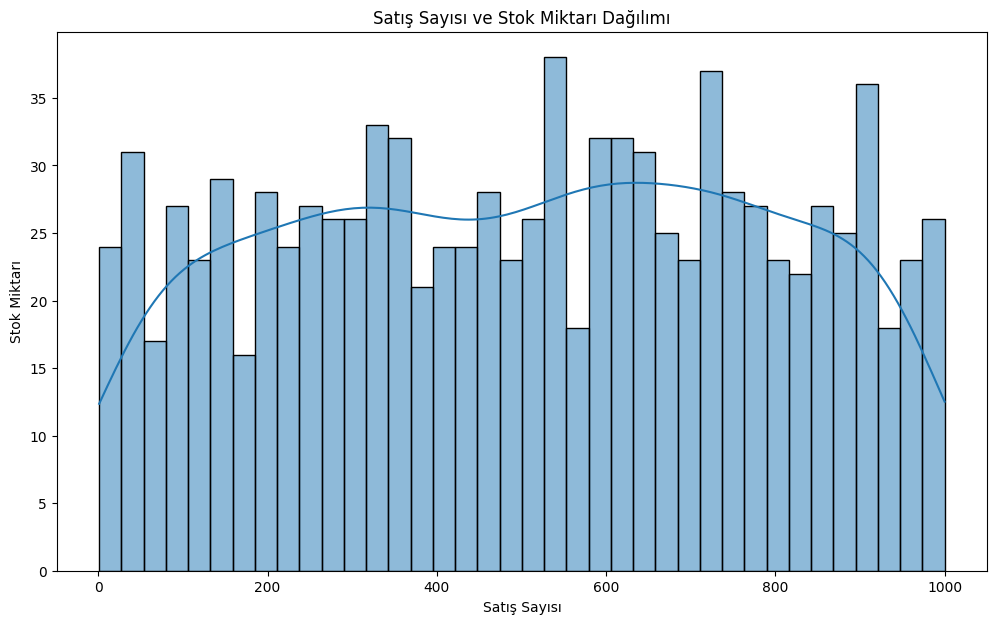

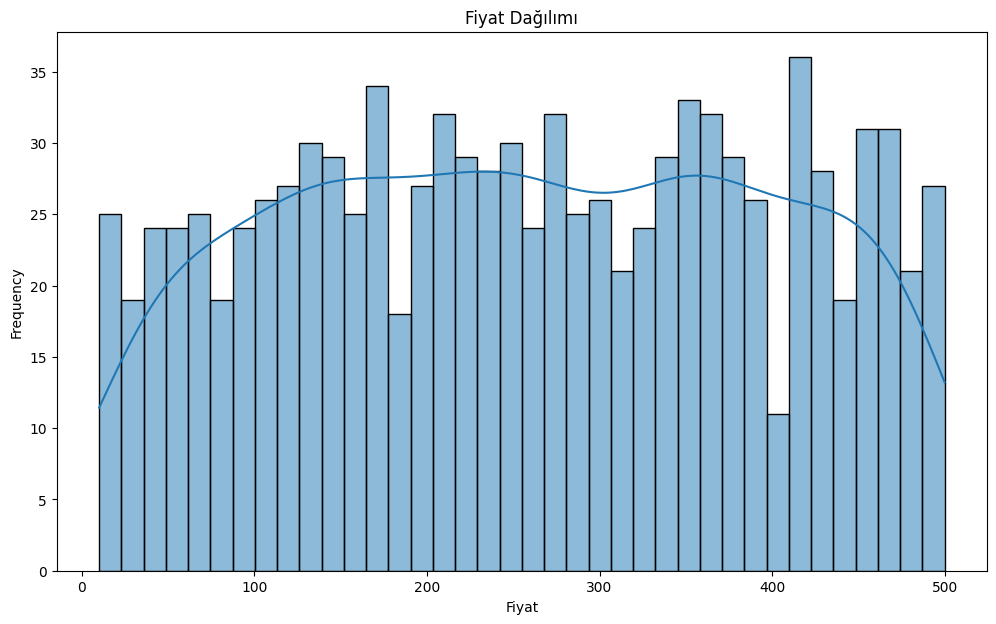

In [ ]:
plt.figure(figsize=(12,7))#plt.figure = grfiğin boyutunu ayarlar.
sns.histplot(veri["Satış Sayısı"], bins=38, kde=True)# bins = histogramdaki çubuk sayısını belirler.
# kde çekirdek yoğunluğunu belirler.
plt.title("Satış Sayısı ve Stok Miktarı Dağılımı")#Grafiğin genel başlığı.
plt.xlabel("Satış Sayısı")# x ekseninde bulunan değerler.
plt.ylabel("Stok Miktarı")#y ekseninde bulunan değerler.
plt.show() # grafiği gösterir.

plt.figure(figsize=(12,7))
sns.histplot(veri["Fiyat"], bins=38, kde=True )
plt.title("Fiyat Dağılımı")
plt.xlabel("Fiyat")
plt.ylabel("Frequency")
plt.show()


<ipython-input-19-d44d6fd6ba37>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kategori',y='Ürün Adı',data=veri,palette='viridis')# barplot çubuk grafiği ile çizer. palette= grafiğin renk paletini belirler.


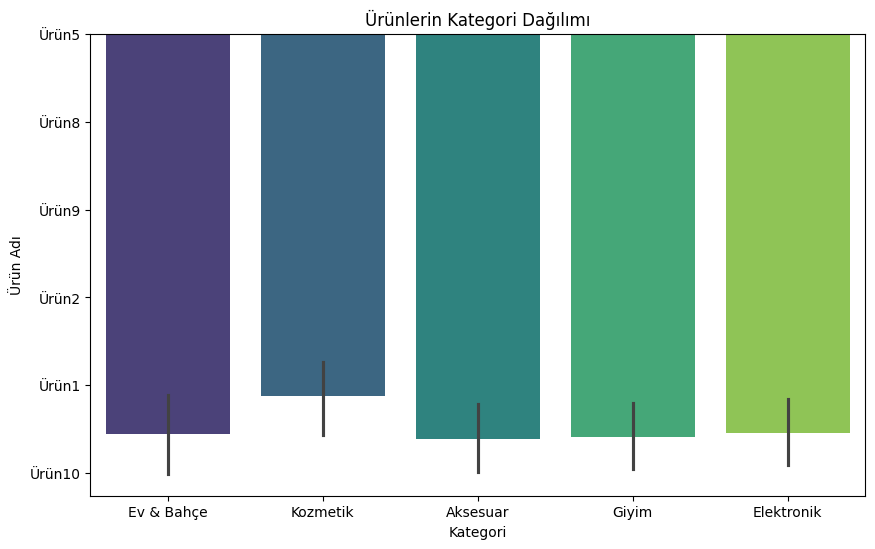

In [ ]:
df = pd.DataFrame(veri)

plt.figure(figsize=(10, 6))
sns.barplot(x='Kategori',y='Ürün Adı',data=veri,palette='viridis')# barplot çubuk grafiği ile çizer. palette= grafiğin renk paletini belirler.
plt.title("Ürünlerin Kategori Dağılımı")
plt.xlabel("Kategori")
plt.ylabel("Ürün Adı")
plt.show()

 **4.Kategorik Değişkenlerin Kodlanması**

In [ ]:
veri['Kategori'] = veri['Kategori'].astype('category') #astype('category') = bir veri serisini kategorik bir veri türüne dönüştürmeye yarar.
veri['Kategori'] = veri['Kategori'].cat.codes # cat.codes = Python’da veri analizi ve veri çerçeveleri (dataframes) ile ilgili kullanılır.
veri
veri['Ürün Adı'] = veri['Ürün Adı'].astype('category')
veri['Ürün Adı'] = veri['Ürün Adı'].cat.codes
veri
veri['Marka'] = veri['Marka'].astype('category')
veri['Marka'] = veri['Marka'].cat.codes
veri

,Ürün Adı,Kategori,Marka,Stok Miktarı,Satış Sayısı,Yorum Sayısı,Ortalama Puan,Tarih
0,5,2,4,96,283,1,1.9,2024-02-17 15:18:45.291585
1,8,4,0,37,835,11,4.0,2023-07-21 15:18:45.292898
2,8,0,4,14,457,3,2.9,2024-03-19 15:18:45.293026
3,9,2,3,7,254,8,4.7,2024-03-01 15:18:45.293077
4,2,2,2,80,35,12,3.5,2024-05-21 15:18:45.293117
...,...,...,...,...,...,...,...,...
995,0,1,3,73,418,13,5.0,2023-06-24 15:18:45.327863
996,8,2,4,63,735,33,4.4,2024-04-05 15:18:45.327894
997,8,2,4,28,867,1,3.6,2024-04-26 15:18:45.327925
998,4,0,0,29,610,24,3.8,2023-09-22 15:18:45.327955


In [ ]:
veri.head(3)

,Ürün Adı,Kategori,Marka
0,1,1,0
1,1,0,1
2,1,1,0


**Veri Normalizasyonu**

In [ ]:
veri = pd.read_csv("E_Commerce_Dataset.csv")
veri.head()
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ürün Adı       1000 non-null   object 
 1   Kategori       1000 non-null   object 
 2   Marka          1000 non-null   object 
 3   Fiyat          1000 non-null   int64  
 4   Stok Miktarı   1000 non-null   int64  
 5   Satış Sayısı   1000 non-null   int64  
 6   Yorum Sayısı   1000 non-null   int64  
 7   Ortalama Puan  1000 non-null   float64
 8   Tarih          1000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB


In [ ]:
veri=veri[["Fiyat","Stok Miktarı","Satış Sayısı","Yorum Sayısı","Ortalama Puan"]]
veri.head(3)


,Fiyat,Stok Miktarı,Satış Sayısı,Yorum Sayısı,Ortalama Puan
0,55,96,283,1,1.9
1,120,37,835,11,4.0
2,110,14,457,3,2.9


In [ ]:
y=veri['Fiyat'] # y için normalizasyon yapılmaz.çünkü y zaten fiyatı gösteriyor.outlier etkisini azaltır.model performansı artar.
x=veri.drop("Fiyat",axis=1)
ss=StandardScaler()
x2=ss.fit_transform(x) # transform = traning datasetinde gözlen birimlerini istenen formülizasyona koyar.
mm=MinMaxScaler()
x2=mm.fit_transform(x)
x2=pd.DataFrame(x2) #dataframe= programlama dillerindeki iki boyutlu veri yapısıdır.
x2.head(3)

,0,1,2,3
0,0.96,0.282282,0.02,0.225
1,0.37,0.834835,0.22,0.750
2,0.14,0.456456,0.06,0.475


**5.Model Oluşturma ve Değerlendirme**

In [ ]:
from sklearn import linear_model
veri = pd.read_csv("E_Commerce_Dataset.csv")
veri= pd.DataFrame(veri)
veri

,Ürün Adı,Kategori,Marka,Fiyat,Stok Miktarı,Satış Sayısı,Yorum Sayısı,Ortalama Puan,Tarih
0,Ürün5,Ev & Bahçe,Marka5,55,96,283,1,1.9,2024-02-17 15:18:45.291585
1,Ürün8,Kozmetik,Marka1,120,37,835,11,4.0,2023-07-21 15:18:45.292898
2,Ürün8,Aksesuar,Marka5,110,14,457,3,2.9,2024-03-19 15:18:45.293026
3,Ürün9,Ev & Bahçe,Marka4,133,7,254,8,4.7,2024-03-01 15:18:45.293077
4,Ürün2,Ev & Bahçe,Marka3,268,80,35,12,3.5,2024-05-21 15:18:45.293117
...,...,...,...,...,...,...,...,...,...
995,Ürün1,Elektronik,Marka4,351,73,418,13,5.0,2023-06-24 15:18:45.327863
996,Ürün8,Ev & Bahçe,Marka5,291,63,735,33,4.4,2024-04-05 15:18:45.327894
997,Ürün8,Ev & Bahçe,Marka5,366,28,867,1,3.6,2024-04-26 15:18:45.327925
998,Ürün4,Aksesuar,Marka1,24,29,610,24,3.8,2023-09-22 15:18:45.327955


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
len(X_test) # len= dizi karakter sayısını gösterir.

200

In [ ]:
veri = veri.drop(columns=['Fiyat']) # drop = sütun kaldırdığı gibi satır da kaldırır.

In [ ]:
veri['Kategori'] = veri['Kategori'].astype('category')
veri['Kategori'] = veri['Kategori'].cat.codes
veri

,Ürün Adı,Kategori,Marka,Stok Miktarı,Satış Sayısı,Yorum Sayısı,Ortalama Puan,Tarih
0,Ürün5,2,Marka5,96,283,1,1.9,2024-02-17 15:18:45.291585
1,Ürün8,4,Marka1,37,835,11,4.0,2023-07-21 15:18:45.292898
2,Ürün8,0,Marka5,14,457,3,2.9,2024-03-19 15:18:45.293026
3,Ürün9,2,Marka4,7,254,8,4.7,2024-03-01 15:18:45.293077
4,Ürün2,2,Marka3,80,35,12,3.5,2024-05-21 15:18:45.293117
...,...,...,...,...,...,...,...,...
995,Ürün1,1,Marka4,73,418,13,5.0,2023-06-24 15:18:45.327863
996,Ürün8,2,Marka5,63,735,33,4.4,2024-04-05 15:18:45.327894
997,Ürün8,2,Marka5,28,867,1,3.6,2024-04-26 15:18:45.327925
998,Ürün4,0,Marka1,29,610,24,3.8,2023-09-22 15:18:45.327955


In [ ]:
veri.isnull().sum() # isnull geçerli veri yok ise boole değeri döndürür.

Ürün Adı         0
Kategori         0
Marka            0
Stok Miktarı     0
Satış Sayısı     0
Yorum Sayısı     0
Ortalama Puan    0
Tarih            0
dtype: int64

In [ ]:
veri = veri.dropna() # Verilerimiz arasında herhengi bir NaN değer barındıran satırı siler.
veri

,Ürün Adı,Kategori,Marka,Stok Miktarı,Satış Sayısı,Yorum Sayısı,Ortalama Puan,Tarih
0,Ürün5,2,Marka5,96,283,1,1.9,2024-02-17 15:18:45.291585
1,Ürün8,4,Marka1,37,835,11,4.0,2023-07-21 15:18:45.292898
2,Ürün8,0,Marka5,14,457,3,2.9,2024-03-19 15:18:45.293026
3,Ürün9,2,Marka4,7,254,8,4.7,2024-03-01 15:18:45.293077
4,Ürün2,2,Marka3,80,35,12,3.5,2024-05-21 15:18:45.293117
...,...,...,...,...,...,...,...,...
995,Ürün1,1,Marka4,73,418,13,5.0,2023-06-24 15:18:45.327863
996,Ürün8,2,Marka5,63,735,33,4.4,2024-04-05 15:18:45.327894
997,Ürün8,2,Marka5,28,867,1,3.6,2024-04-26 15:18:45.327925
998,Ürün4,0,Marka1,29,610,24,3.8,2023-09-22 15:18:45.327955


In [ ]:
X= veri.drop(columns=['Marka'])
X

,Ürün Adı,Kategori,Stok Miktarı,Satış Sayısı,Yorum Sayısı,Ortalama Puan,Tarih
0,Ürün5,2,96,283,1,1.9,2024-02-17 15:18:45.291585
1,Ürün8,4,37,835,11,4.0,2023-07-21 15:18:45.292898
2,Ürün8,0,14,457,3,2.9,2024-03-19 15:18:45.293026
3,Ürün9,2,7,254,8,4.7,2024-03-01 15:18:45.293077
4,Ürün2,2,80,35,12,3.5,2024-05-21 15:18:45.293117
...,...,...,...,...,...,...,...
995,Ürün1,1,73,418,13,5.0,2023-06-24 15:18:45.327863
996,Ürün8,2,63,735,33,4.4,2024-04-05 15:18:45.327894
997,Ürün8,2,28,867,1,3.6,2024-04-26 15:18:45.327925
998,Ürün4,0,29,610,24,3.8,2023-09-22 15:18:45.327955


In [ ]:
veri['Ürün Adı'] = veri['Ürün Adı'].astype('category')
veri['Ürün Adı'] = veri['Ürün Adı'].cat.codes
veri

,Ürün Adı,Kategori,Marka,Stok Miktarı,Satış Sayısı,Yorum Sayısı,Ortalama Puan,Tarih
0,5,2,Marka5,96,283,1,1.9,2024-02-17 15:18:45.291585
1,8,4,Marka1,37,835,11,4.0,2023-07-21 15:18:45.292898
2,8,0,Marka5,14,457,3,2.9,2024-03-19 15:18:45.293026
3,9,2,Marka4,7,254,8,4.7,2024-03-01 15:18:45.293077
4,2,2,Marka3,80,35,12,3.5,2024-05-21 15:18:45.293117
...,...,...,...,...,...,...,...,...
995,0,1,Marka4,73,418,13,5.0,2023-06-24 15:18:45.327863
996,8,2,Marka5,63,735,33,4.4,2024-04-05 15:18:45.327894
997,8,2,Marka5,28,867,1,3.6,2024-04-26 15:18:45.327925
998,4,0,Marka1,29,610,24,3.8,2023-09-22 15:18:45.327955


In [ ]:
y= veri['Marka']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
X_test

,Ürün Adı,Kategori,Stok Miktarı,Satış Sayısı,Yorum Sayısı,Ortalama Puan,Tarih
521,Ürün10,1,65,286,7,4.4,2024-02-19 15:18:45.311958
737,Ürün10,0,71,292,14,4.0,2023-09-11 15:18:45.319247
740,Ürün2,4,18,882,11,4.4,2023-06-13 15:18:45.319344
660,Ürün9,0,78,219,15,4.2,2024-05-28 15:18:45.316369
411,Ürün8,4,57,920,32,4.7,2023-08-19 15:18:45.308068
...,...,...,...,...,...,...,...
408,Ürün4,3,93,663,46,3.1,2023-09-09 15:18:45.307964
332,Ürün9,1,60,834,15,2.1,2024-02-29 15:18:45.305137
208,Ürün1,3,80,787,39,4.8,2024-04-22 15:18:45.300499
613,Ürün8,0,86,240,23,3.3,2024-01-30 15:18:45.314886


In [ ]:
X_train

,Ürün Adı,Kategori,Stok Miktarı,Satış Sayısı,Yorum Sayısı,Ortalama Puan,Tarih
29,Ürün10,4,0,424,13,2.2,2024-01-13 15:18:45.294001
535,Ürün8,4,76,699,40,3.0,2023-08-14 15:18:45.312392
695,Ürün3,3,8,819,49,1.6,2023-08-07 15:18:45.317764
557,Ürün5,4,47,788,9,4.2,2024-03-11 15:18:45.313100
836,Ürün6,0,71,702,39,1.4,2023-06-13 15:18:45.322636
...,...,...,...,...,...,...,...
106,Ürün1,4,78,450,23,1.5,2024-03-31 15:18:45.296934
270,Ürün10,3,28,599,11,1.4,2023-12-31 15:18:45.302846
860,Ürün10,3,68,390,8,2.9,2024-05-03 15:18:45.323426
435,Ürün8,4,18,908,35,1.3,2023-11-23 15:18:45.308954


**Model oluşturma ve test etme**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

**LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression

**

In [ ]:
log_reg = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
log_reg.score(X_train, y_train)

0.2225

In [ ]:
log_reg.score(X_test, y_test)

0.28